<a href="https://colab.research.google.com/github/saryurawaley/Engphys3mn4/blob/main/Assignments/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

Due: Thursday Nov 6th EOD

## Q1. The Blasius equation appears in fluid mechanics as a laminar flow boundary layer and is written:

$$y^{\prime\prime\prime} + y y^{\prime\prime} = 0 $$

### a) Express this 3rd order ODE as a system of first order ODEs.
{answer}

In [4]:
y_1_prime = 'y_2'
y_2_prime = 'y_3'
y_3_prime = '-y_1 * y_3'

print(f"The system of first-order ODEs is:")
print(f"y_1' = {y_1_prime}")
print(f"y_2' = {y_2_prime}")
print(f"y_3' = {y_3_prime}")

The system of first-order ODEs is:
y_1' = y_2
y_2' = y_3
y_3' = -y_1 * y_3


### b) Solve for $y(z)$ as an initial value problem assuming the boundary conditions below and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime\prime}(z = 0) &= 1 \\
\end{align}
$$

HINT: Read and consider part c) before implementing this.

{Method, answer}

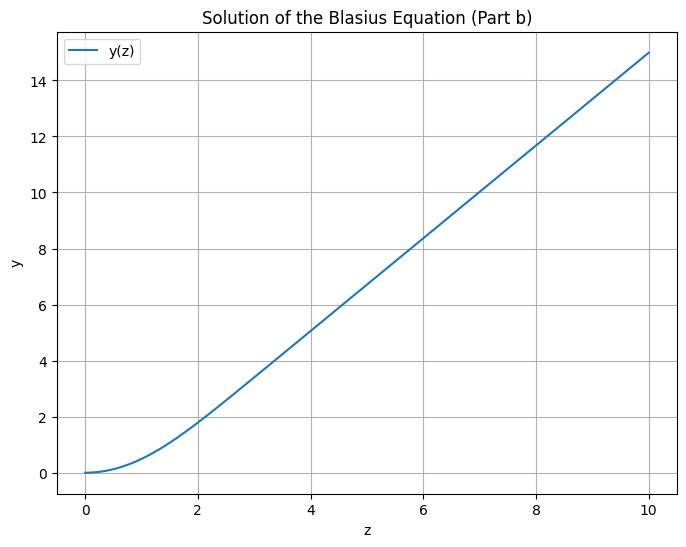

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of first-order ODEs
def blasius_ode(z, y):
    y1, y2, y3 = y
    dy1dz = y2
    dy2dz = y3
    dy3dz = -y1 * y3
    return [dy1dz, dy2dz, dy3dz]

# Define the initial conditions
y0 = [0, 0, 1]

# Define the range for z
z_span = (0, 10) # We can adjust the upper limit based on convergence

# Solve the ODE
sol = solve_ivp(blasius_ode, z_span, y0, dense_output=True)

# Generate points for plotting
z_plot = np.linspace(z_span[0], z_span[1], 100)
y_plot = sol.sol(z_plot)

# Plot the solution for y(z)
plt.figure(figsize=(8, 6))
plt.plot(z_plot, y_plot[0], label='y(z)')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Solution of the Blasius Equation (Part b)')
plt.grid(True)
plt.legend()
plt.show()

## c) Use your *method* from b) to find a solution for $y(z)$ that fits the boundary conditions below, and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime}(z = \infty) &= 2 \\
\end{align}
$$

{Method, implementation, answer}

## Q2

The Fourier series shows that periodic functions can be written as an infinite sum of sine and cosine waves:

 $$f(x)= \frac{A_0}{2}+\sum_{n=1}^{\infty}A_n\ \cos{(nx)} + B_n\ \sin{(nx)}$$

Due to function orthogonality, the values of $A_n$ and $B_n$ can be computed using the following formulae:

 $$A_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos{(nx)}\ dx$$
 $$B_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin{(nx)}\ dx$$

Periodic functions can be approximated by truncating the Fourier series at some $n = N$.

### 2a

Write a function that takes a $2-\pi$ periodic function and a degree $n$, then outputs the $n-th$ Fourier coefficients $[A_n, B_n]$. Use the equations above with a suitable integration method. (Don't use packaged Fourier analysis tools)

Test it for a suitable set of functions for which you have an analytic answer.

{implementation, answer}

In [11]:
from scipy.integrate import quad

def fourier_coefficients(f, n):
    """
    Calculates the n-th Fourier coefficients [A_n, B_n] for a 2pi-periodic function.

    Args:
        f: The 2pi-periodic function.
        n: The order of the coefficient.

    Returns:
        A tuple containing the n-th Fourier coefficients (A_n, B_n).
    """
    # Calculate A_n
    integrand_a = lambda x: f(x) * np.cos(n * x)
    a_n, _ = quad(integrand_a, -np.pi, np.pi)
    a_n /= np.pi

    # Calculate B_n
    integrand_b = lambda x: f(x) * np.sin(n * x)
    b_n, _ = quad(integrand_b, -np.pi, np.pi)
    b_n /= np.pi

    return a_n, b_n

# Test the function with a known function, e.g., f(x) = x for -pi to pi
# The Fourier series for f(x) = x is 2 * sum((-1)^(n+1)/n * sin(nx))
# So, A_n = 0 and B_n = 2 * (-1)^(n+1) / n
def test_function(x):
    return x

n_test = 3
a_n_test, b_n_test = fourier_coefficients(test_function, n_test)

print(f"For f(x) = x and n = {n_test}:")
print(f"Calculated A_{n_test}: {a_n_test}")
print(f"Calculated B_{n_test}: {b_n_test}")
print(f"Expected A_{n_test}: 0")
print(f"Expected B_{n_test}: {2 * (-1)**(n_test + 1) / n_test}")

For f(x) = x and n = 3:
Calculated A_3: 0.0
Calculated B_3: 0.6666666666666665
Expected A_3: 0
Expected B_3: 0.6666666666666666


### 2b
Find the coefficients of the following functions and expansion orders:
{All answers}

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 5

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 20

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 20

In [12]:
# Case 1: f(x) = np.mod(x, np.pi/2), N = 5
f_case1 = lambda x: np.mod(x + np.pi, np.pi/2) - np.pi/4 # Adjusting for 2pi period
N_case1 = 5

print(f"Calculating coefficients for f(x) = mod(x, pi/2) with N = {N_case1}")
for n in range(N_case1 + 1):
    a_n, b_n = fourier_coefficients(f_case1, n)
    if n == 0:
        print(f"A_0: {a_n}")
    else:
        print(f"A_{n}: {a_n}, B_{n}: {b_n}")

print("-" * 20)

# Case 2: f(x) = np.mod(x, np.pi/2), N = 20
f_case2 = lambda x: np.mod(x + np.pi, np.pi/2) - np.pi/4 # Adjusting for 2pi period
N_case2 = 20

print(f"Calculating coefficients for f(x) = mod(x, pi/2) with N = {N_case2}")
for n in range(N_case2 + 1):
    a_n, b_n = fourier_coefficients(f_case2, n)
    if n == 0:
        print(f"A_0: {a_n}")
    else:
        print(f"A_{n}: {a_n}, B_{n}: {b_n}")

print("-" * 20)

# Case 3: f(x) = (x > -np.pi/2) & (x < np.pi/2), N = 2
f_case3 = lambda x: 1 if (-np.pi/2 < x < np.pi/2) else 0
N_case3 = 2

print(f"Calculating coefficients for f(x) = 1 for -pi/2 < x < pi/2, 0 otherwise with N = {N_case3}")
for n in range(N_case3 + 1):
    a_n, b_n = fourier_coefficients(f_case3, n)
    if n == 0:
        print(f"A_0: {a_n}")
    else:
        print(f"A_{n}: {a_n}, B_{n}: {b_n}")

print("-" * 20)

# Case 4: f(x) = (x > -np.pi/2) & (x < np.pi/2), N = 20
f_case4 = lambda x: 1 if (-np.pi/2 < x < np.pi/2) else 0
N_case4 = 20

print(f"Calculating coefficients for f(x) = 1 for -pi/2 < x < pi/2, 0 otherwise with N = {N_case4}")
for n in range(N_case4 + 1):
    a_n, b_n = fourier_coefficients(f_case4, n)
    if n == 0:
        print(f"A_0: {a_n}")
    else:
        print(f"A_{n}: {a_n}, B_{n}: {b_n}")

Calculating coefficients for f(x) = mod(x, pi/2) with N = 5
A_0: -3.273567972371871e-17
A_1: 3.533949646070574e-17, B_1: 4.417437057588218e-17
A_2: -5.300924469105861e-17, B_2: -5.71582190871061e-17
A_3: 5.300924469105861e-17, B_3: -5.300924469105861e-17
A_4: 5.327969633972611e-18, B_4: -0.49999999999999983
A_5: -9.718361526694079e-17, B_5: -1.501928599579994e-16
--------------------
Calculating coefficients for f(x) = mod(x, pi/2) with N = 20
A_0: -3.273567972371871e-17
A_1: 3.533949646070574e-17, B_1: 4.417437057588218e-17
A_2: -5.300924469105861e-17, B_2: -5.71582190871061e-17
A_3: 5.300924469105861e-17, B_3: -5.300924469105861e-17
A_4: 5.327969633972611e-18, B_4: -0.49999999999999983
A_5: -9.718361526694079e-17, B_5: -1.501928599579994e-16
A_6: 5.521796321985272e-17, B_6: -3.091211274588415e-17
A_7: -2.6504622345529306e-17, B_7: 2.6504622345529306e-17
A_8: 1.807826832573361e-17, B_8: -0.2499999999999999
A_9: -3.092205940311753e-17, B_9: 2.6504622345529306e-17
A_10: 6.62615558638232

## Q3:

Given $$\int_{-1}^1 f(x) dx = 3$$ and $$f(-3^{-\frac{1}{2}}) = 1$$

Assuming $f$ is a cubic polynomial, what is $f(3^{-\frac{1}{2}})$? Why?

{answer}

In [13]:
# Given that the integral of f(x) from -1 to 1 is 3, and f is a cubic polynomial.
# A cubic polynomial can be written as f(x) = ax^3 + bx^2 + cx + d.
# The integral of f(x) from -1 to 1 is:
# Integral(-1, 1) (ax^3 + bx^2 + cx + d) dx
# = [a*x^4/4 + b*x^3/3 + c*x^2/2 + d*x] from -1 to 1
# = (a/4 + b/3 + c/2 + d) - (a/4*(-1)^4 + b/3*(-1)^3 + c/2*(-1)^2 + d*(-1))
# = (a/4 + b/3 + c/2 + d) - (a/4 - b/3 + c/2 - d)
# = 2*b/3 + 2*d

# We are given that the integral is 3, so 2*b/3 + 2*d = 3.

# We are also given f(-3^(-1/2)) = 1.
# Let x_0 = 3^(-1/2). Then -x_0 = -3^(-1/2).
# f(-x_0) = a*(-x_0)^3 + b*(-x_0)^2 + c*(-x_0) + d = -ax_0^3 + bx_0^2 - cx_0 + d = 1

# We want to find f(3^(-1/2)) = f(x_0).
# f(x_0) = a*x_0^3 + b*x_0^2 + c*x_0 + d

# Let's consider the integral again:
# Integral(-1, 1) f(x) dx = Integral(-1, 1) (ax^3 + bx^2 + cx + d) dx = 2*b/3 + 2*d = 3

# Now let's look at f(x_0) + f(-x_0):
# f(x_0) + f(-x_0) = (ax_0^3 + bx_0^2 + cx_0 + d) + (-ax_0^3 + bx_0^2 - cx_0 + d)
# = 2*b*x_0^2 + 2*d

# We know that x_0 = 3^(-1/2), so x_0^2 = (3^(-1/2))^2 = 3^(-1) = 1/3.
# f(x_0) + f(-x_0) = 2*b*(1/3) + 2*d = 2*b/3 + 2*d

# From the integral condition, we know that 2*b/3 + 2*d = 3.
# Therefore, f(x_0) + f(-x_0) = 3.

# We are given f(-x_0) = f(-3^(-1/2)) = 1.
# So, f(x_0) + 1 = 3.
# f(x_0) = 3 - 1 = 2.

# Thus, f(3^(-1/2)) = 2.

# Reason:
# For a cubic polynomial f(x) = ax^3 + bx^2 + cx + d, the integral from -1 to 1 is 2b/3 + 2d.
# Given the integral is 3, we have 2b/3 + 2d = 3.
# Also, for any symmetric points x and -x, f(x) + f(-x) = (ax^3 + bx^2 + cx + d) + (-ax^3 + bx^2 - cx + d) = 2bx^2 + 2d.
# In this case, x = 3^(-1/2), so x^2 = 1/3.
# Therefore, f(3^(-1/2)) + f(-3^(-1/2)) = 2b(1/3) + 2d = 2b/3 + 2d.
# Since 2b/3 + 2d = 3, we have f(3^(-1/2)) + f(-3^(-1/2)) = 3.
# Given f(-3^(-1/2)) = 1, we can substitute this into the equation:
# f(3^(-1/2)) + 1 = 3
# f(3^(-1/2)) = 2.

Given that $\int_{-1}^1 f(x) dx = 3$ and $f$ is a cubic polynomial, we have $f(x) = ax^3 + bx^2 + cx + d$.
The integral of $f(x)$ from $-1$ to $1$ is $\int_{-1}^1 (ax^3 + bx^2 + cx + d) dx = \left[\frac{ax^4}{4} + \frac{bx^3}{3} + \frac{cx^2}{2} + dx\right]_{-1}^1 = (\frac{a}{4} + \frac{b}{3} + \frac{c}{2} + d) - (\frac{a}{4} - \frac{b}{3} + \frac{c}{2} - d) = \frac{2b}{3} + 2d$.
We are given that this integral is equal to 3, so $\frac{2b}{3} + 2d = 3$.

Now consider the sum of the function evaluated at $3^{-\frac{1}{2}}$ and $-3^{-\frac{1}{2}}$:
$f(3^{-\frac{1}{2}}) + f(-3^{-\frac{1}{2}}) = (a(3^{-\frac{1}{2}})^3 + b(3^{-\frac{1}{2}})^2 + c(3^{-\frac{1}{2}}) + d) + (a(-3^{-\frac{1}{2}})^3 + b(-3^{-\frac{1}{2}})^2 + c(-3^{-\frac{1}{2}}) + d)$
$= (a(3^{-\frac{3}{2}}) + b(3^{-1}) + c(3^{-\frac{1}{2}}) + d) + (-a(3^{-\frac{3}{2}}) + b(3^{-1}) - c(3^{-\frac{1}{2}}) + d)$
$= 2b(3^{-1}) + 2d = \frac{2b}{3} + 2d$.

We found that $\frac{2b}{3} + 2d = 3$ from the integral condition. Therefore, $f(3^{-\frac{1}{2}}) + f(-3^{-\frac{1}{2}}) = 3$.
We are given that $f(-3^{-\frac{1}{2}}) = 1$. Substituting this into the equation:
$f(3^{-\frac{1}{2}}) + 1 = 3$
$f(3^{-\frac{1}{2}}) = 3 - 1 = 2$.

Thus, $f(3^{-\frac{1}{2}}) = 2$.

Reason: For a cubic polynomial $f(x) = ax^3 + bx^2 + cx + d$, the integral from -1 to 1 depends only on the coefficients of the even powers of x (b and d). Similarly, for any symmetric points x and -x, the sum $f(x) + f(-x)$ also depends only on the coefficients of the even powers of x. In this specific case where $x^2 = 1/3$, the relationship between the integral and the sum $f(x) + f(-x)$ is direct, leading to $f(3^{-\frac{1}{2}}) + f(-3^{-\frac{1}{2}}) = \int_{-1}^1 f(x) dx$. Given the integral value and $f(-3^{-\frac{1}{2}})$, we can find $f(3^{-\frac{1}{2}})$.